In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
# import sys

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6545070293437585067
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15606513664
locality {
  bus_id: 1
}
incarnation: 10730825261377117358
physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:0a:00.0, compute capability: 7.0"
]


# Speed Test

In [2]:
# TF
Nlist=[5, 1000, 3000]
T=10
timeDiffNP=np.zeros((T,len(Nlist)), dtype=np.float32)
timeDiffTF=np.zeros((T,len(Nlist)), dtype=np.float32)
for N in range(len(Nlist)):
    A=np.random.rand(Nlist[N],Nlist[N])
    Atf=tf.constant(A)
    Btf=Atf@Atf@Atf@Atf@Atf
#     Btf=tf.matmul(tf.matmul(tf.matmul(tf.matmul(Atf,Atf),Atf),Atf),Atf)
    sess=tf.Session()
    
    for i in range(T):
        ticNP=time.time()
        B=A@A@A@A@A
        tocNP=time.time()
        

        ticTF=time.time()
        sess.run(Btf)
        tocTF=time.time()    
        timeDiffNP[i,N]=tocNP-ticNP
        timeDiffTF[i,N]=tocTF-ticTF        
    print('{0}X{0}: {1:f}'.format(Nlist[N], np.mean(timeDiffNP[N,:])))
    print('{0}X{0}: {1:f}'.format(Nlist[N], np.mean(timeDiffTF[N,:])))
#         print('{0}X{0}: {1}'.format(N, tocNP-ticNP))
#         print('{0}X{0}: {1}'.format(N, tocTF-ticTF))

5X5: 0.000220
5X5: 0.001704
1000X1000: 0.014354
1000X1000: 0.000504
3000X3000: 0.223366
3000X3000: 0.002518


In [3]:
for N in range(len(Nlist)):
    print('{0}X{0}: {1:f}'.format(Nlist[N], np.mean(timeDiffNP[N,:], axis=0)))
    print('{0}X{0}: {1:f}'.format(Nlist[N], np.mean(timeDiffTF[N,:], axis=0)))

5X5: 0.227282
5X5: 1.037137
1000X1000: 0.222561
1000X1000: 0.002582
3000X3000: 0.223366
3000X3000: 0.002518


## Create Data and Templates

<IPython.core.display.Javascript object>


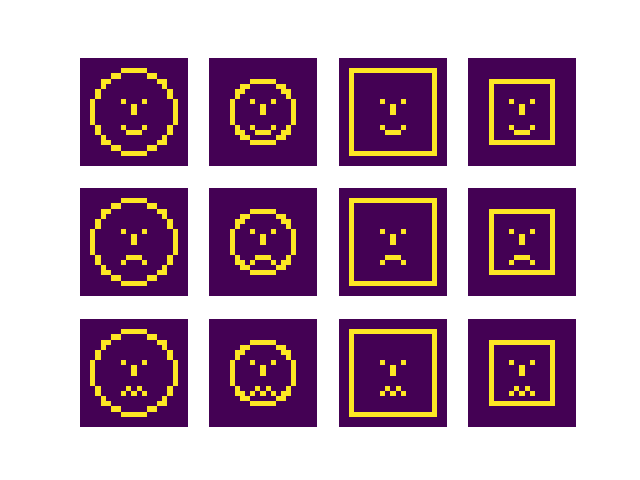

<IPython.core.display.Javascript object>


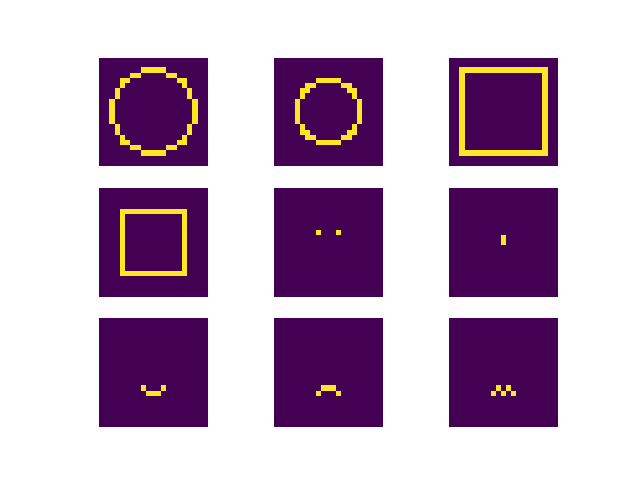

In [4]:
r=8
w1=np.zeros((21,21))
x1=np.array([np.arange(21)]).T
x2=np.array([np.arange(21)])
X1, X2=np.meshgrid(x1,x2)
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w1[x1c, x2c]=1
# plt.figure()
# plt.imshow(w1)
# plt.close()
r=6
w2=np.zeros((21,21))
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w2[x1c, x2c]=1
# plt.figure()
# plt.imshow(w2)
# plt.close()
r=8
w3=np.zeros((21,21))
w3[2*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[18*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[2:19 ,2*np.ones((1,17),dtype=np.int8)]=1
w3[2:19 ,18*np.ones((1,17),dtype=np.int8)]=1
# plt.imshow(w3)
r=6
w4=np.zeros((21,21))
w4[4*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[16*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[4:17, 4*np.ones((1,13),dtype=np.int8)]=1
w4[4:17, 16*np.ones((1,13),dtype=np.int8)]=1
# plt.imshow(w4)
w5=np.zeros((21,21))
w5[[8,8], [8,12]]=1;
# plt.imshow(w5)
w6=np.zeros((21,21))
w6[9:11, [10,10]]=1;
# plt.imshow(w6)
w7=np.zeros((21,21))
w7[[13,14,14,14,13], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w8=np.zeros((21,21))
w8[[14,13,13,13,14], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w9=np.zeros((21,21))
w9[[14,13,14,13,14], [8,9,10,11,12]]=1;



# plt.imshow(w1+w5+w6+w8)
# w1, w2, w3, w4
# w5, w6
# w7
# w8
X=np.zeros((12,21*21))
X[0,:]=(w1+w5+w6+w7).reshape((1,21*21))
X[1,:]=(w2+w5+w6+w7).reshape((1,21*21))
X[2,:]=(w3+w5+w6+w7).reshape((1,21*21))
X[3,:]=(w4+w5+w6+w7).reshape((1,21*21))
X[4,:]=(w1+w5+w6+w8).reshape((1,21*21))
X[5,:]=(w2+w5+w6+w8).reshape((1,21*21))
X[6,:]=(w3+w5+w6+w8).reshape((1,21*21))
X[7,:]=(w4+w5+w6+w8).reshape((1,21*21))
X[8,:]=(w1+w5+w6+w9).reshape((1,21*21))
X[9,:]=(w2+w5+w6+w9).reshape((1,21*21))
X[10,:]=(w3+w5+w6+w9).reshape((1,21*21))
X[11,:]=(w4+w5+w6+w9).reshape((1,21*21))
X=X.T


W=np.zeros((9,21*21))
W[0,:]=w1.reshape((1,21*21))
W[1,:]=w2.reshape((1,21*21))
W[2,:]=w3.reshape((1,21*21))
W[3,:]=w4.reshape((1,21*21))
W[4,:]=w5.reshape((1,21*21))
W[5,:]=w6.reshape((1,21*21))
W[6,:]=w7.reshape((1,21*21))
W[7,:]=w8.reshape((1,21*21))
W[8,:]=w9.reshape((1,21*21))
W=W.T

# 
%matplotlib notebook
plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[:,i].reshape((21,21)))
    plt.axis('off')
    plt.show()
    
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(W[:,i].reshape((21,21)))
    plt.axis('off')
    plt.show()


## Closed form solution

<IPython.core.display.Javascript object>


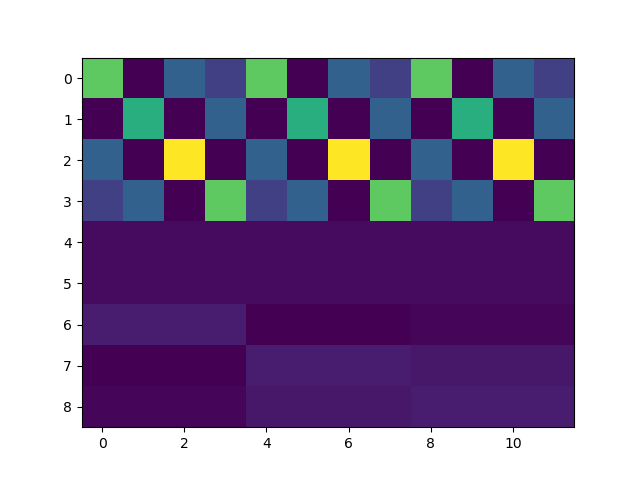

In [5]:
H=W.T@X
plt.figure()
plt.imshow(H)

<IPython.core.display.Javascript object>


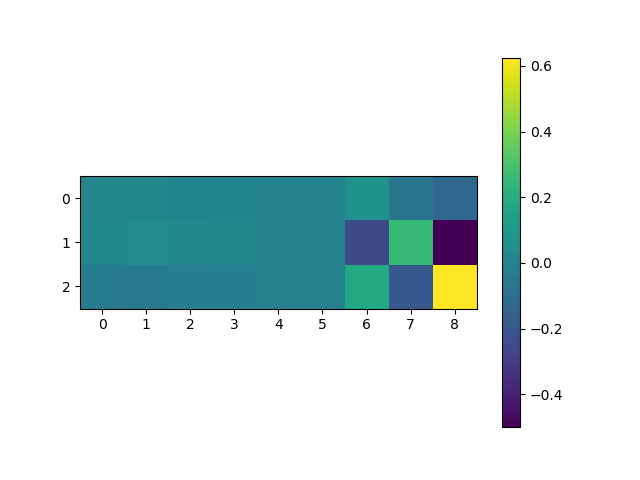

<IPython.core.display.Javascript object>


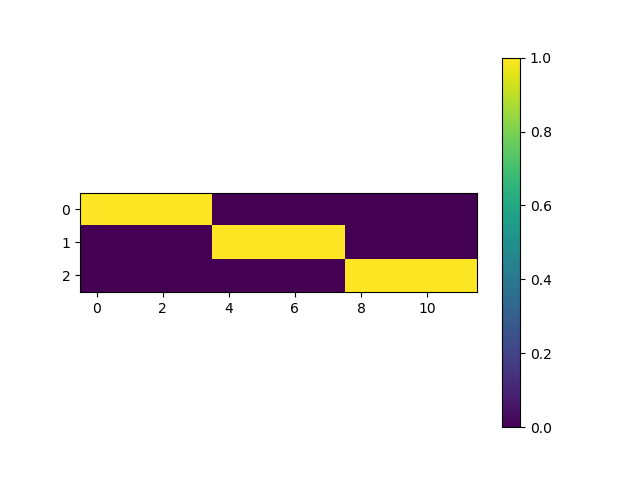

In [6]:
y=np.array([[1,1,1,1,0,0,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0,0,0,0], [0,0,0,0,0,0,0,0,1,1,1,1]])
W2=np.linalg.pinv(H@H.T)@H@y.T
plt.figure()
plt.imshow(W2.T)
plt.colorbar()

yh=W2.T@H
plt.figure()
plt.imshow(yh)
plt.colorbar()

# print(W2)

<IPython.core.display.Javascript object>


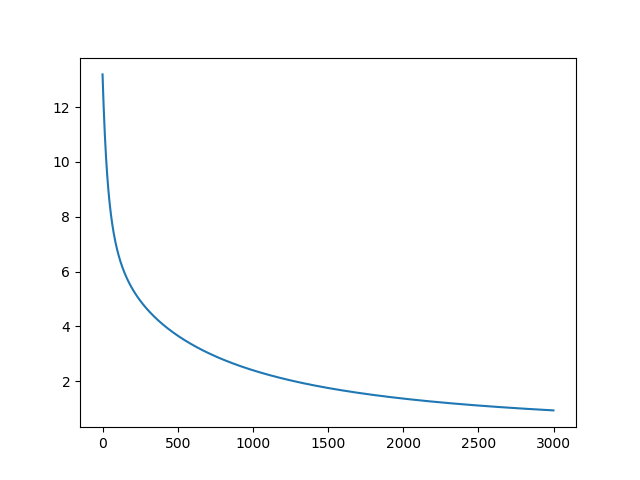

<IPython.core.display.Javascript object>


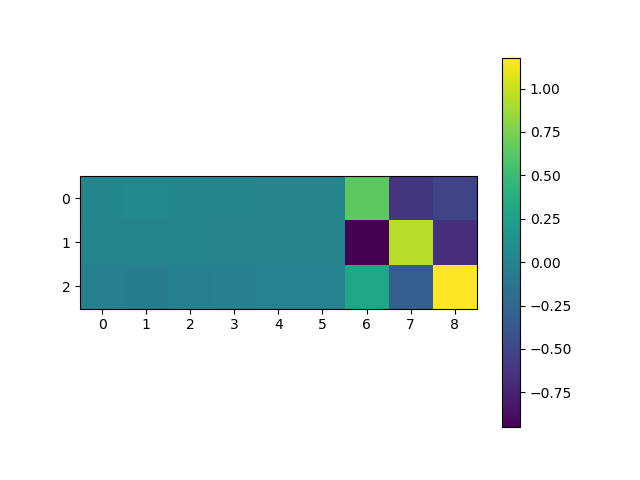

<IPython.core.display.Javascript object>


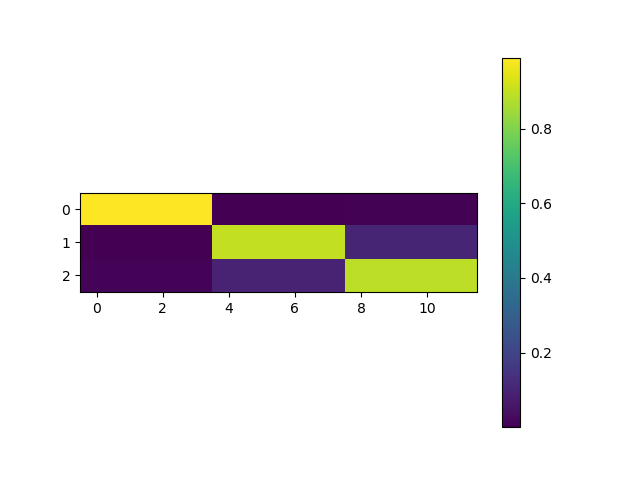

In [7]:
y=np.array([[1,1,1,1,0,0,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0,0,0,0], [0,0,0,0,0,0,0,0,1,1,1,1]])
W2=(np.random.rand(3,9)-0.5)*.001
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0, keepdims=True)
N=3000
err=np.zeros(N)
lr=0.0003
for i in range(N):
    z=W2@H
    yh=softmax(z)
    err[i]=np.sum(-y*np.log(yh))
    dW2=-(yh-y)@H.T
    W2+=dW2*lr

plt.figure()
plt.plot(err)
plt.show()    

plt.figure()
plt.imshow(W2)
plt.colorbar()

plt.figure()
plt.imshow(yh)
plt.colorbar()

In [8]:

def TB(cleanup=True):
    import webbrowser
    webbrowser.open('http://127.0.1.1:6006')

    !tensorboard --logdir="logs"

    if cleanup:
        !rm -R logs/
        

In [9]:
sess = tf.InteractiveSession()

with tf.name_scope('lastlayer'):
    lr=tf.constant(0.0003, dtype=tf.float32, name='learningRate')
    Y=tf.constant(np.array([[1,1,1,1,0,0,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0,0,0,0], [0,0,0,0,0,0,0,0,1,1,1,1]]),
                  dtype=tf.float32, name='target')
    H=tf.constant(W.T@X, dtype=tf.float32, name='input')
#     Y=tf.placeholder(tf.float32, name='target')
#     H=tf.placeholder(tf.float32, name='input')
    W2=tf.Variable((tf.random_uniform((3,9))-.5)*.001, name='weights')
    with tf.name_scope('output'): 
        Yh=W2@H
        err=tf.reduce_sum(-Y*tf.log(tf.exp(Yh)/tf.reduce_sum(tf.exp(Yh), 0, True)))
    dW2=tf.gradients(err, W2)
    update=tf.assign(W2, W2-lr*dW2[0])
    

tf.global_variables_initializer().run()
train_writer = tf.summary.FileWriter("/home/minje/Dropbox/ipython/Deep Learning Systems 2018/logs/",
                                     sess.graph)
maxIter=3000
errt=np.zeros(maxIter, dtype=np.float32)
for i in range(maxIter):
#     dW2t, errt[i]=sess.run([dW2, err], feed_dict={H: W.T@X, Y: np.array([[1,1,1,1,0,0,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0,0,0,0], [0,0,0,0,0,0,0,0,1,1,1,1]])})
    errt[i], _=sess.run([err, update])
#     if np.mod(i,10) == 0:
#         plt.figure()
#         plt.imshow(W2)
#         plt.show()

# train_writer.add_summary(summary)    

plt.figure()
plt.plot(errt)
plt.show()
# dW2t.size()

# show_graph(tf.get_default_graph().as_graph_def())
TB()
sess.close()

# W2=


# y = tf.placeholder(tf.float32)
# squared_deltas = tf.square(linear_model - y)
# loss = tf.reduce_sum(squared_deltas)

# np.array([[1,1,1,1,0,0,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0,0,0,0], [0,0,0,0,0,0,0,0,1,1,1,1]]), 
#                   name='target')

# train_writer.add_summary(summary)    

PermissionDeniedError: /home/minje; Permission denied

In [8]:
sess.close()